# Backpropagation Lab





In [1]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import arff

## 1 Avoiding Overfit: Early Stopping and Loss Regularization

### 1.1 (10%) No overfit avoidance
Train the sklearn [MLP classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier) on the [Iris Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/iris.arff).  Use 3 output nodes (1 per class). Expanding the one output variable into 3 is called one-hot encoding or dummy variable encoding. There are lots of ways to implement this including the Pandas get_dummies method. This experiment is set up to run a little longer to better see the effects of overfit.  Be patient as there are lots of hidden nodes and a high max iterations setting.

Use default parameters except for the following:
- hidden_layer_sizes = [64] - One hidden layer with 64 hidden nodes
- activation = 'logistic'
- solver = 'sgd'
- alpha = 0
- batch_size = 1
- learning_rate_init = 0.01
- shuffle = True
- momentum = 0
- n_iter_no_change = 50
- max_iterations = 1000

Use a random 80/20 split of the data.  Run it a few times with different random training/test splits and give average values for
- Number of iterations until convergence
- Training set accuracy
- Test set accuracy
For one run observe the softmax probabilities on the test set using clf.predict_proba

In [2]:
#Iris with no regularization
data = arff.loadarff('irisData.arff')
df = pd.DataFrame(data[0])
df['class'] = df['class'].apply(lambda x: x.decode('utf-8'))
X = df.drop(columns='class').values
y = df['class'].values


clf = MLPClassifier(hidden_layer_sizes=[64],
                    activation='logistic',
                    solver='sgd',
                    alpha=0,batch_size=1,
                    learning_rate_init=0.01,
                    shuffle=True, momentum=0,
                    n_iter_no_change=50,
                    max_iter=1000)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

avg_iterations_array = []
avg_train_accuracy_array = []
avg_test_accuracy_array = []

clf.fit(X_train, y_train)

test_prediction = clf.predict(X_test)
train_prediction = clf.predict(X_train)

for i in range(4):
  y_pred = clf.predict(X_test)
  avg_iterations_array.append(clf.n_iter_)
  avg_train_accuracy_array.append(accuracy_score(y_train, train_prediction))
  avg_test_accuracy_array.append(accuracy_score(y_test, test_prediction))
  clf.fit(X_train, y_train)


print("Average iterations: ", np.mean(avg_iterations_array))
print("Average train accuracy: ", np.mean(avg_train_accuracy_array))
print("Average test accuracy: ", np.mean(avg_test_accuracy_array))
print("Softmax probabilities:\n", clf.predict_proba(X_test))


Average iterations:  249.0
Average train accuracy:  0.9666666666666667
Average test accuracy:  0.9333333333333333
Softmax probabilities:
 [[2.74288472e-04 9.23675931e-01 7.60497806e-02]
 [9.97721366e-01 2.27863385e-03 6.69638773e-15]
 [8.57125948e-11 9.32472505e-05 9.99906753e-01]
 [2.84685936e-04 8.99233235e-01 1.00482079e-01]
 [3.07568308e-04 9.38835302e-01 6.08571297e-02]
 [9.96605155e-01 3.39484476e-03 1.82558016e-14]
 [1.28981187e-02 9.86967138e-01 1.34743387e-04]
 [1.87545281e-06 6.16348405e-02 9.38363284e-01]
 [3.66108226e-05 4.72460189e-01 5.27503200e-01]
 [3.65517868e-03 9.95405695e-01 9.39126130e-04]
 [5.97072332e-06 1.32952897e-01 8.67041132e-01]
 [9.95309555e-01 4.69044527e-03 3.26505917e-14]
 [9.98351167e-01 1.64883339e-03 2.51648667e-15]
 [9.95300833e-01 4.69916708e-03 3.35730211e-14]
 [9.97770868e-01 2.22913211e-03 6.48357043e-15]
 [4.62890468e-04 9.45202195e-01 5.43349149e-02]
 [5.33911911e-09 1.36456247e-03 9.98635432e-01]
 [2.01203980e-03 9.95563069e-01 2.42489170e-03

**I was a little surprised at how many iterations it took for the model to converge. I suspect this is because of the large number of hidden nodes invloved, which give a good answer, but at the cost of time.**

### 1.2 (10%) Early Stopping (Validation Set)

- Do the same as above but his time with early stopping
- Use a validation set taken from the training set for your stopping criteria. Using 10-15% of the training set for a validation set is common. You do this simply by setting the MLPClassifier early_stopping, validation_fraction, and n_iter_no_change parameters.
- Run it a few times with different training/test splits and give average values for
    - Number of iterations until convergence
    - Training set accuracy
    - Test set accuracy
    - Best validation score (MLPClassifer attribute best_validation_score_)
- For one run create a graph with validation set accuracy (*y*-axis) vs epochs (*x*-axis). Hint: MLPClassifer attribute validation_scores_

Note: Due to the simplicity of and lack of noise in the iris data set you will not see the accuracy improvements that early stopping or loss regularization can give for more complex noisy datasets.  In particular, early stopping will have lower than expected results because with a very small VS taken from a very small training set there is less data to train on and more variance with the VS score.  Thus, you will probably get lower accuracies for VS than normal training for this less typical case.  But at least you will get practice on using early stopping and loss regularization for future data sets.

Average iterations:  24.75
Average train accuracy:  0.9166666666666666
Average test accuracy:  0.9333333333333333
Best validation score:  1.0


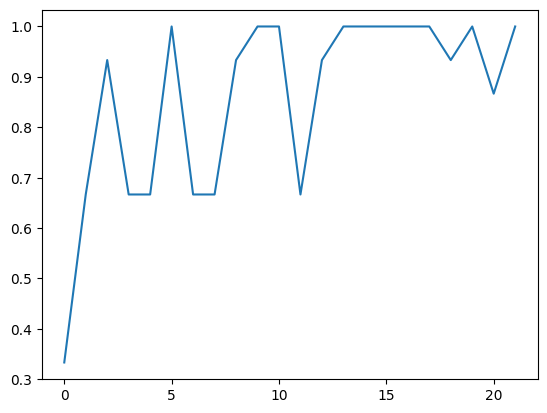

In [3]:
#Iris with early stopping and validation scores graph

clf = MLPClassifier(hidden_layer_sizes=[64],
                    activation='logistic',
                    solver='sgd',
                    alpha=0,batch_size=1,
                    learning_rate_init=0.01,
                    shuffle=True, momentum=0,
                    n_iter_no_change=15,
                    max_iter=1000,
                    early_stopping= True,
                    validation_fraction= .12)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

avg_iterations_array = []
avg_train_accuracy_array = []
avg_test_accuracy_array = []

clf.fit(X_train, y_train)

test_prediction = clf.predict(X_test)
train_prediction = clf.predict(X_train)

for i in range(4):
  y_pred = clf.predict(X_test)
  avg_iterations_array.append(clf.n_iter_)
  avg_train_accuracy_array.append(accuracy_score(y_train, train_prediction))
  avg_test_accuracy_array.append(accuracy_score(y_test, test_prediction))
  clf.fit(X_train, y_train)


print("Average iterations: ", np.mean(avg_iterations_array))
print("Average train accuracy: ", np.mean(avg_train_accuracy_array))
print("Average test accuracy: ", np.mean(avg_test_accuracy_array))
print("Best validation score: ", clf.best_validation_score_)

plt.plot(clf.validation_scores_)

**The average nunmber of iterations till convergence seemed to come out to around 25, so I had to experiment with the n_iter_no_change number until it made my graph end at about 25 total iterations.**

**As for the train accuracy, test accuracy, and best validation score, everything looks about correct! Because of the high number of hidden nodes, everything converges eventually, so this all looks proper!**

### 1.3 (10%) Loss Regularization

- Do the same as in 1.1 but his time with loss regularization (Do not do early stopping)
- Run it with different L2 regularization parameter values (alpha).  The default for alpha is .0001.  Try other values such as .1, .01, .001, .00001, etc. Make a table with each row including:
    - The regularization parameter value
    - Number of iterations until convergence
    - Training set accuracy
    - Test set accuracy
    - Best loss value (MLPClassifer attribute best_loss_)
- Which regularization value gave you the best results?
- For your best regularization value do one run and create a graph with loss (*y*-axis) vs epochs (*x*-axis) for the training set (Hint: MLPClassifer attribute loss_curve_)

     Alpha  Iterations  Train Accuracy  Test Accuracy  Best Loss
0  0.10000          30        0.716667       0.733333   0.930328
1  0.05000          30        0.858333       0.800000   0.761062
2  0.01000          75        0.958333       0.933333   0.383479
3  0.00500         100        0.966667       0.966667   0.264195
4  0.00100         127        0.983333       1.000000   0.123361
5  0.00050         127        0.983333       1.000000   0.101316
6  0.00010         127        0.983333       1.000000   0.082375
7  0.00005         127        0.983333       1.000000   0.079918
8  0.00001         127        0.983333       1.000000   0.077937


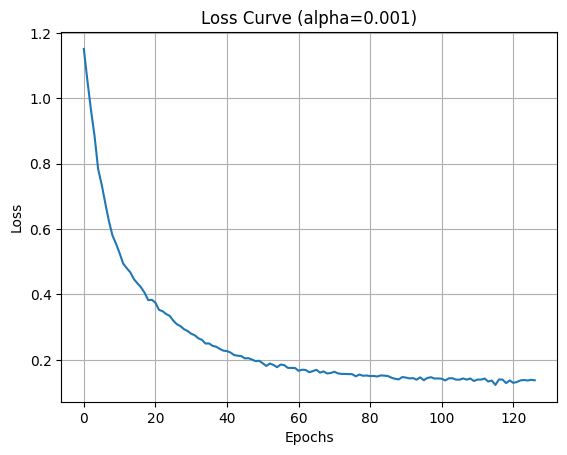

In [4]:
data = arff.loadarff('irisData.arff')
df = pd.DataFrame(data[0])
df['class'] = df['class'].apply(lambda x: x.decode('utf-8'))
X = df.drop(columns='class').values
y = df['class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

alphas = [0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001, 0.00005, 0.00001]

results = []

for alpha in alphas:
    clf = MLPClassifier(hidden_layer_sizes=[64],
                        activation='logistic',
                        solver='sgd',
                        alpha=alpha,
                        batch_size=1,
                        learning_rate_init=0.01,
                        shuffle=True,
                        momentum=0,
                        max_iter=1000,
                        random_state=42)

    clf.fit(X_train, y_train)

    train_prediction = clf.predict(X_train)
    test_prediction = clf.predict(X_test)

    train_accuracy = accuracy_score(y_train, train_prediction)
    test_accuracy = accuracy_score(y_test, test_prediction)

    best_loss = clf.best_loss_
    n_iter = clf.n_iter_

    results.append([alpha, n_iter, train_accuracy, test_accuracy, best_loss])

results_df = pd.DataFrame(results, columns=['Alpha', 'Iterations', 'Train Accuracy', 'Test Accuracy', 'Best Loss'])
print(results_df)

best_alpha = results_df.loc[results_df['Test Accuracy'].idxmax(), 'Alpha']
clf_best = MLPClassifier(hidden_layer_sizes=[64],
                         activation='logistic',
                         solver='sgd',
                         alpha=best_alpha,
                         batch_size=1,
                         learning_rate_init=0.01,
                         shuffle=True,
                         momentum=0,
                         max_iter=1000,
                         random_state=42)

clf_best.fit(X_train, y_train)

plt.plot(clf_best.loss_curve_)
plt.title(f'Loss Curve (alpha={best_alpha})')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

**This is super cool! With a large alpha, the number of iterations goes down, because the model is learning faster and very simply. HOWEVER, the accuracy is super low! This is likely because of underfit from too simple of a model.**

**The really cool part comes when we decrease the alpha value a little bit, and the accuracy goes way up (best at 0.001) with the smallest increase in iterations possible. This is a good place to be, where it's neither overfitting nor underfitting.**

**Anyway, the actual discussion:**

**- No regularization takes many iterations and tends to overfit**

**- Early Stopping reduces the number of iterations, but can underfit, and the precise stopping point may have to be finagled to get the most accurate results**

**- L2 Loss Regularization seems to neither overfit, nor underfit when given the best alpha value, but at the cost of incresing iterations from early stopping. A very middle choice**


## 2 Hyperparameters
In this section we use the [Vowel Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/vowel.arff) to consider the hyperparameters of learning rate, number of hidden nodes, and momentum.

### 2.1 (10%) Vowel Dataset Questions
- Give the baseline accuracies for the Iris and Vowel datasets. Baseline accuracy is what you would get if the model just outputs the majority class of the data set (i.e. the output value which occurs most often). These two data sets are not great example for this as they have an equal amount of each class, which is not typical.
- Discuss why the vowel data set will probably have lower accuracy than Iris.
- Consider which of the vowel dataset's input features you should not use in training and discuss why.

**Baselines**

- The baseline accuracy of the iris dataset will be 33.33%. This is because it has 3 classes, and therefore an equal chance of outputting any of them.

- The baseline accuracy of the vowel dataset will be 9.09%, since the vowel dataset has 11 output classes, and the probability is equal across all outputs

**Difference in accuracy**

- The accuracy of vowel will be lower than iris, because the vowel dataset has more output classes, therefore more possible options and more opportunity to be incorrect

**Vowel inputs to ignore**

- The speaker name/number should be thrown out. The model will pick up on which speakers pronounce things in what ways, and will associate the speech with the speaker.

- The same is true for sex. I think the difference from person to person in pronunciation will be equal to that of the difference between the sexes, and so that input can be removed as well.

- Finally, the Train or Test input is not necessary. I will decide what's train and what's test silly arff file


### 2.2 (10%) Learning Rate
Load the [Vowel Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/vowel.arff). Drop any features which you explained above as being inappropriate for training.

Hints: Consider the Pandas drop method for dropping columns. When you want to transform features in your data set there are lots of approaches. You could edit the arff file directly, or make the transforms in your code.  The Pandas replace method is nice for that. For example, if you wanted to change the vowel data set gender feature in a Pandas dataframe to 0/1 you could do the following:

vowel_df['Sex'] = vowel_df['Sex'].str.decode('utf-8')   //Changes the byte code data into a normal string, b'Male' becomes "Male"\
vowel_df = vowel_df.replace('Male', 0)\
vowel_df = vowel_df.replace('Female', 1)

- Use one layer of hidden nodes with the number of hidden nodes being twice the number of inputs.
- Use a random 75/25 split of the data for the training/test set.
- Do not use early stopping.
- Try at least 5 different learning rates (LR) from very small (e.g. .001) to pretty big (e.g. 10). Each LR will require a different number of epochs to learn. LR effects both accuracy and time required for learning.
- Create a table which includes a row for each LR.  Your table columns should be LR, # epochs to learn the model, final training set accuracy and final test set accuracy.  As learning rates get smaller, it usually takes more epochs to learn. If your model is stopping learning too soon (converging) by hitting max_iterations (in this case and in experiments below), then you need to increase your max_iterations parameter in order to give your model more learning time.  To keep things faster, you don't need to increase max_iter past 1000 if you don't want to, but point out when more iterations may have given improvement.

In real testing one averages the results of multiple trials per LR (and other parameters) with different intitial conditions (training/test split, initial weights, etc.). That gives more accurate results but is not required for this lab.

In [5]:
data = arff.loadarff('vowelData.arff')
df = pd.DataFrame(data[0])

df['Class'] = df['Class'].apply(lambda x: x.decode('utf-8'))

df = df.drop(columns=['Sex', 'Speaker Number', 'Train or Test'])

class_mapping = {
    'hid': 0, 'hId': 1, 'hEd': 2, 'hAd': 3, 'hYd': 4,
    'had': 5, 'hOd': 6, 'hod': 7, 'hUd': 8, 'hud': 9, 'hed': 10
}
df['class'] = df['Class'].map(class_mapping)

X = df.drop(columns=['class', 'Class']).values
y = df['class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

input_size = X_train.shape[1]

learning_rates = [0.001, 0.01, 0.05, 0.1, 0.5, 1, 2, 5, 7.5, 10]

results = []

for lr in learning_rates:
    clf = MLPClassifier(hidden_layer_sizes=(input_size * 2,),
                        activation='logistic',
                        solver='sgd',
                        alpha=0,
                        batch_size=1,
                        learning_rate_init=lr,
                        shuffle=True,
                        momentum=0,
                        max_iter=1000)

    clf.fit(X_train, y_train)

    n_epochs = clf.n_iter_
    train_acc = accuracy_score(y_train, clf.predict(X_train))
    test_acc = accuracy_score(y_test, clf.predict(X_test))

    results.append([lr, n_epochs, train_acc, test_acc])

results_df = pd.DataFrame(results, columns=['Learning Rate', 'Epochs', 'Training Accuracy', 'Test Accuracy'])

print(results_df)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


   Learning Rate  Epochs  Training Accuracy  Test Accuracy
0          0.001    1000           0.793801       0.653226
1          0.010     770           0.989218       0.891129
2          0.050     382           1.000000       0.907258
3          0.100     223           0.998652       0.879032
4          0.500      74           0.787062       0.754032
5          1.000      35           0.452830       0.443548
6          2.000      12           0.188679       0.213710
7          5.000      21           0.129380       0.084677
8          7.500      18           0.092992       0.084677
9         10.000      17           0.084906       0.108871


**This table is super interesting, because the accuracy results are bell shaped. This is because I had max epochs set at 1000, otherwise the learning rate 0.001 model would have gotten much better! But it also would have taken much longer.**

**It appears as though a learning rate of .1 was best. It wasn't the most accuratem, but it's really good and didn't have a crazy number of epochs. Even though 0.05 has a better accuracy score, it wasn't high enough to justify 3x the amount of epochs.**

**The larger learning rates prevented the model from fitting correctly, and although less epochs were needed, the accuracy dropped SIGNIFICANTLY**

### 2.3 (10%) Number of Hidden Nodes

Using the best LR you discovered, experiment with different numbers of hidden nodes.

- Start with 1 hidden node, then 2, and then double them for each test until you get no more improvement in accuracy.
- Create a table just like above, except with # of hidden nodes rather than LR.

In general, whenever you are testing a parameter such as # of hidden nodes, keep testing values until no more improvement is found. For example, if 20 hidden nodes did better than 10, you would not stop at 20, but would try 40, etc., until you no longer got improvement.

In [6]:
best_lr = 0.1

hidden_nodes = [1, 2, 4, 8, 16, 32, 64, 128, 256]

results = []

for nodes in hidden_nodes:
    clf = MLPClassifier(hidden_layer_sizes=(nodes,),
                        activation='logistic',
                        solver='sgd',
                        alpha=0,
                        batch_size=1,
                        learning_rate_init=best_lr,
                        shuffle=True,
                        momentum=0,
                        max_iter=1000)

    clf.fit(X_train, y_train)

    n_epochs = clf.n_iter_
    train_acc = accuracy_score(y_train, clf.predict(X_train))
    test_acc = accuracy_score(y_test, clf.predict(X_test))

    results.append([nodes, n_epochs, train_acc, test_acc])

results_df = pd.DataFrame(results, columns=['Hidden Nodes', 'Epochs', 'Training Accuracy', 'Test Accuracy'])

print(results_df)


   Hidden Nodes  Epochs  Training Accuracy  Test Accuracy
0             1      36           0.239892       0.145161
1             2      74           0.331536       0.229839
2             4      40           0.575472       0.487903
3             8      79           0.757412       0.681452
4            16     113           0.964960       0.899194
5            32     270           1.000000       0.911290
6            64     233           1.000000       0.935484
7           128     279           1.000000       0.931452
8           256     280           1.000000       0.931452


**The results matched my intuition of what was going to happen. Increasing the number of hidden nodes increases accuracy, but also increases number of epochs. If there aren't enough hidden nodes, the most accurate results won't be found. But too many hidden nodes takes FOREVER**

**It appears as though the sweet spot for this data set is 16 hidden nodes, since it gets our accuracy very close to perfect without taking took much time. If accuracy is more important than time, then maybe 32 would be better, or even a number in between the two**

### 2.4 (10%) Momentum

Try at least 5 different momentum terms between 0 and just less than 1 using the best number of hidden nodes and LR from your earlier experiments.

- Create a table just like above, except with momentum values rather than LR or number of hidden nodes.

In [9]:
best_lr = 0.1
hidden_nodes = 32
momentum_values = [0.1, 0.3, 0.5, 0.6, 0.7, 0.9]

results = []

for momentum in momentum_values:
    clf = MLPClassifier(hidden_layer_sizes=(hidden_nodes,),
                        activation='logistic',
                        solver='sgd',
                        alpha=0,
                        batch_size=1,
                        learning_rate_init=best_lr,
                        shuffle=True,
                        momentum=momentum,
                        max_iter=1000)

    clf.fit(X_train, y_train)

    n_epochs = clf.n_iter_
    train_acc = accuracy_score(y_train, clf.predict(X_train))
    test_acc = accuracy_score(y_test, clf.predict(X_test))

    results.append([momentum, n_epochs, train_acc, test_acc])

results_df = pd.DataFrame(results, columns=['Momentum', 'Epochs', 'Training Accuracy', 'Test Accuracy'])

print(results_df)


   Momentum  Epochs  Training Accuracy  Test Accuracy
0       0.1     214           1.000000       0.911290
1       0.3     236           1.000000       0.911290
2       0.5      75           0.977089       0.883065
3       0.6      75           0.975741       0.879032
4       0.7      37           0.854447       0.754032
5       0.9      13           0.303235       0.294355


**I tested once with 16 hidden nodes, but none of my accuracies on the momentum tests got above 80%, so i decided 32 was better.**

**It looks like .5 is the ideal momentum since it got near 100% accuracy in just 75 epochs. This is CRAZY, because that means each of these hyperparameters being added has linearly decreased the number of epochs, while keeping accuracy virtually unchanged!**

### 2.5 (10%) Automatic Hyperparameter Discovery
Using the vowel dataset, automatically adjust the LR, # of hidden nodes, and momentum using [grid and random search](https://scikit-learn.org/stable/modules/grid_search.html)
- For grid search include the most promising hyperparameter values you used in your experiments above.  You may add others also.
- Be patient as the grid search can take a while since it has to train all combinations of models. Don't use too many parameter options or it will be too slow.
- Report your best hyperparameters and accuracy.  Unfortunately, you will not always get as high a score as you might expect.  This is in part due to the simplicity of the dataset.  It also teaches that in gerneral you should not blindly assume that a tool will get you the results you expect, and that you may need to consider multiple approaches.

In [10]:
#Grid search for hyperparameters.
#Here is one variation of code you could use for your grid search. You can try your own variation if you prefer.

from sklearn.model_selection import GridSearchCV
clf = MLPClassifier(activation='logistic', solver='sgd',alpha=0,early_stopping=True, n_iter_no_change=10, batch_size=1)
parameters = {'learning_rate_init':( 0.05, 1.0, 0.5),
              'hidden_layer_sizes': ([8], [16], [32]),
              'momentum':(0.3, 0.5, 0.7)}
grid = GridSearchCV(clf, parameters)
grid.fit(X_train,y_train)
print(grid.best_params_)
print(grid.best_score_)

{'hidden_layer_sizes': [32], 'learning_rate_init': 0.05, 'momentum': 0.7}
0.8302829675312898


In [11]:
#Randomized search for hyperparameters
#Here is one variation of code you could use for your randomized search.

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
clf = MLPClassifier(activation='logistic', solver='sgd',alpha=0,early_stopping=True, n_iter_no_change=10, batch_size=1)
distributions = dict(learning_rate_init=uniform(loc=.01, scale=1.99), #loc is the min val, and loc + scale is the max val
                    hidden_layer_sizes = ([8], [16], [32], [64], [128]), #since there is no distribution it samples these values uniformly
                    momentum=uniform(loc=0,scale =.99))
search = RandomizedSearchCV(clf, distributions, n_iter=10)
search.fit(X_train, y_train)
print(search.best_params_)
print(search.best_score_)

{'hidden_layer_sizes': [128], 'learning_rate_init': 0.3723678920867956, 'momentum': 0.12746371457284636}
0.7317612914928351


*Discussion and comparison of grid and randomized parameter search*

**It seems at though the grid search did much better than the randomized search in terms of accuracy. However, as it always seems to be, the randomized search took a lot less time to complete. In this case because it was a matter of minutes rather than hours, I would still take the grid search over anything else.**

**The grid search did almost as well as my manual search, and took significantly less time!**

## 3 Regression with MLPs

### 3.1 (10%) - Learn a regression data set of your choice

Train MLP on any real world data set that requires regression (i.e. has a real valued ouput) and discuss your effort and results.  While the [Irvine ML Repository](https://archive.ics.uci.edu) is a great resource, also onsider [Kaggle](https://www.kaggle.com) and [OpenML](https://openml.org) as other great places to find datasets.
- Use [MLPRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor) rather than MLPclassifier.  It has almost the exact same setup as MLPClassier except it uses the linear activation function for the output nodes and SSE as the loss function.  MLPClassier uses softmax activation for the output nodes and cross-entropy for the loss function.
- Use any reasonable hyperparameters that you want.  
- You will probably need to normalize input features.
- It is not typically necessary to normalize the output.
- Split into train and test and report the training and test set MAEs (Mean Absolute Error). For regression problems where we don't normalize the output, MAE is an intuitive measure as it shows exactly how much our output is off on average.

Training MAE: 3.2700095663726274
Test MAE: 4.6538753700012965


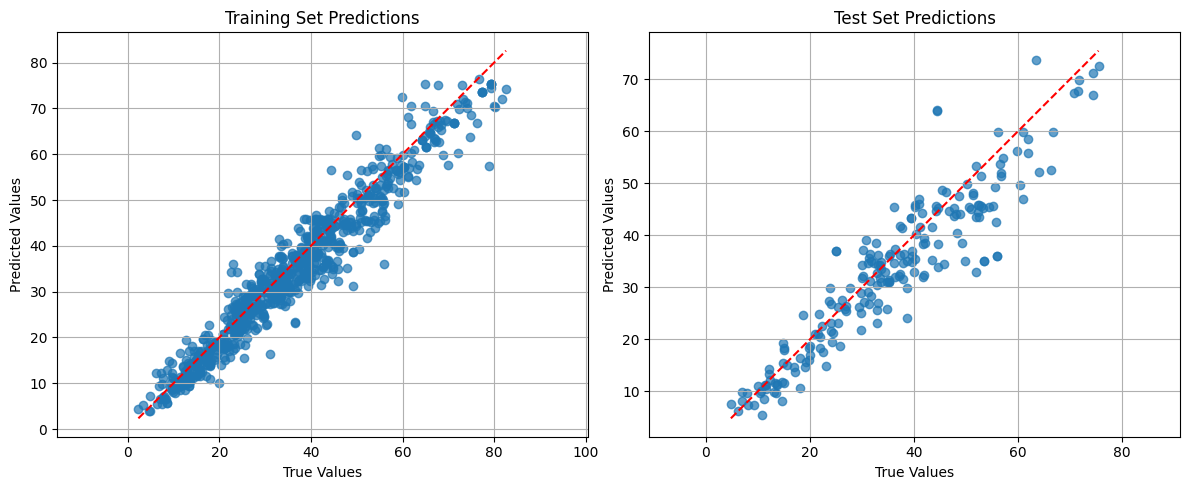

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from ucimlrepo import fetch_ucirepo

concrete_compressive_strength = fetch_ucirepo(id=165)

X = concrete_compressive_strength.data.features
y = concrete_compressive_strength.data.targets

y = y.values.ravel()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

mlp = MLPRegressor(hidden_layer_sizes=(100, 50),
                   activation='logistic',
                   solver='sgd',
                   learning_rate_init=0.01,
                   momentum=0.9,
                   max_iter=1000,
                   random_state=42)

mlp.fit(X_train, y_train)

y_train_pred = mlp.predict(X_train)
y_test_pred = mlp.predict(X_test)

train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print(f'Training MAE: {train_mae}')
print(f'Test MAE: {test_mae}')

# Plot the results
plt.figure(figsize=(12, 5))

# Training set predictions
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.7)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')  # y = x line
plt.title('Training Set Predictions')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.axis('equal')  # Equal scaling for both axes
plt.grid()

# Test set predictions
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # y = x line
plt.title('Test Set Predictions')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.axis('equal')  # Equal scaling for both axes
plt.grid()

plt.tight_layout()
plt.show()


**Very cool! I noticed that much like the test set accuracy is less than the training set acccuracy with classification, the test MAE was larger than the training MAE (indicating more error).**

**I didn't know exactly how to visualize the MAE, so I had ChatGPT write me some code to plot the output, and it makes a lot more sense now! The MAE is how by how much the model errors on average. The plot defintely helped me understand what was going on**

### 3.2 (10%) - Other MLP Hyperparameters
With the same data set, you may (not required) experiment with some of the hyperparameters you already did above (LR, hidden nodes, momentum, validation set parameters, regularization).  But for sure experiment with and discuss the results of the first two hyperparameters below (activation functions and multiple hidden layers).  We encourage you to experiment briefly with the others but they are not required.

- different hidden layer activation functions (tanh, relu in addition to logistic) - Note that Sklean does not currently let you choose the output layer activation function.  It is automatically softmax for classification and linear for regression.
- more than one hidden layer
- solver - try adam and lbfgs in addition to sgd
- batch size
- learning rate adaptation - this is the schedule parameter which lets LR adapt during learning

In [22]:
concrete_compressive_strength = fetch_ucirepo(id=165)
X = concrete_compressive_strength.data.features
y = concrete_compressive_strength.data.targets.values.ravel()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

activation_functions = ['relu', 'tanh']
hidden_layer_configs = [(100,), (100, 50), (100, 50, 25)]

results = []

for activation in activation_functions:
    for hidden_layers in hidden_layer_configs:
        mlp = MLPRegressor(hidden_layer_sizes=hidden_layers,
                           activation=activation,
                           solver='sgd',
                           learning_rate_init=0.001,
                           momentum=0.9,
                           max_iter=2000,
                           random_state=42)

        try:
            mlp.fit(X_train, y_train)

            y_train_pred = mlp.predict(X_train)
            y_test_pred = mlp.predict(X_test)

            train_mae = mean_absolute_error(y_train, y_train_pred)
            test_mae = mean_absolute_error(y_test, y_test_pred)

            results.append({
                'Activation': activation,
                'Hidden Layers': hidden_layers,
                'Training MAE': train_mae,
                'Test MAE': test_mae,
                'Epochs': mlp.n_iter_
            })

        except Exception as e:
            print(f"Error with activation {activation} and layers {hidden_layers}: {e}")

results_df = pd.DataFrame(results)

print("Experiment Results:")
print(results_df.to_string(index=False))


Experiment Results:
Activation Hidden Layers  Training MAE  Test MAE  Epochs
      relu        (100,)      4.111622  4.841491     287
      relu     (100, 50)      3.423140  4.114951     133
      relu (100, 50, 25)      3.100181  4.609840     140
      tanh        (100,)      2.554729  3.725079     773
      tanh     (100, 50)      2.380281  3.665095     292
      tanh (100, 50, 25)      1.826040  3.754458     258


**During my experiementation, I started with logistic as one of the activation function, but it gave me some overwflow problems. I suspect this is because of the multiple hidden layers, but I can't be sure.**

**As for tanh and relu, it appears as though tanh with 3 hidden layers was the best option for this dataset (out of the options I tested). I can't say I know much about either relu or tanh, but it seems that both get better results with more hidden layers, which makes sense. Tanh appears to have some advantage I'm not aware of in this situation, which has allowed it to get much better accuracy than relu.**

## 4. (Optional 20% extra credit) Code up your own MLP/Backprop learner
Below is a scaffold you could use if you want. Requirements for this task:
- Your model should support the methods shown in the example scaffold below.
- Ability to create a network structure with at least one hidden layer and an arbitrary number of nodes. You may choose just one non-linear activation function for all hidden and output nodes if you want (e.g. sigmoid activation function where the loss is SSE rather than cross-entropy).
- Random weight initialization with small random weights with 0 mean. Remember that every hidden and output node should have its own bias weight.
- Use stochastic training updates: update weights after each training instance (i.e. not batch)
- Option to include a momentum term
- Your class can inherit from the relevant scikit-learn learners (e.g. data shuffling, etc.), but don't call any of the super methods to accomplish the core methods in the scaffold.
- Run the Iris data set above with your Backprop version. Show and discuss your results and how they compare with the sklearn version.
- Coding MLP is a good experience but is a little more challening than implementing other models so the extra credit points are higher than typical.

*Discuss your results and any differences*

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin

class MLP(BaseEstimator,ClassifierMixin):

    def __init__(self,lr=.1, momentum=0, shuffle=True,hidden_layer_widths=None):
        """ Initialize class with chosen hyperparameters.

        Args:
            lr (float): A learning rate / step size.
            shuffle(boolean): Whether to shuffle the training data each epoch. DO NOT SHUFFLE for evaluation / debug datasets.
            momentum(float): The momentum coefficent
        Optional Args (Args we think will make your life easier):
            hidden_layer_widths (list(int)): A list of integers which defines the width of each hidden layer if hidden layer is none do twice as many hidden nodes as input nodes. (and then one more for the bias node)
            For example: input width 1, then hidden layer will be 3 nodes
        Example:
            mlp = MLP(lr=.2,momentum=.5,shuffle=False,hidden_layer_widths = [3,3]),  <--- this will create a model with two hidden layers, both 3 nodes wide
        """
        self.hidden_layer_widths
        self.lr = lr
        self.momentum = momentum
        self.shuffle = shuffle


    def fit(self, X, y, initial_weights=None):
        """ Fit the data; run the algorithm and adjust the weights to find a good solution

        Args:
            X (array-like): A 2D numpy array with the training data, excluding targets
            y (array-like): A 2D numpy array with the training targets
        Optional Args (Args we think will make your life easier):
            initial_weights (array-like): allows the user to provide initial weights
        Returns:
            self: this allows this to be chained, e.g. model.fit(X,y).predict(X_test)

        """
        self.weights = self.initialize_weights() if not initial_weights else initial_weights

        return self

    def predict(self, X):
        """ Predict all classes for a dataset X
        Args:
            X (array-like): A 2D numpy array with the training data, excluding targets
        Returns:
            array, shape (n_samples,)
                Predicted target values per element in X.
        """
        pass

    def initialize_weights(self):
        """ Initialize weights for perceptron. Don't forget the bias!

        Returns:

        """

        return [0]

    def score(self, X, y):
        """ Return accuracy of model on a given dataset. Must implement own score function.

        Args:
            X (array-like): A 2D numpy array with data, excluding targets
            y (array-like): A 2D numpy array with targets

        Returns:
            score : float
                Mean accuracy of self.predict(X) wrt. y.
        """

        return 0

    ###  Returns the weights. Not required but helpful for debugging
    def get_weights(self):
        pass
